#      International Migrants Data Analysis

Hi, I'm Menas, a Data Analyst. I hold a Bachelor's Degree in International Business and I am passionate about data analysis because I enjoy finding patterns and translating the data into meaningful insights. 

Welcome to my portfolio project. I chose to analyze a dataset on international migrants and refugees across the world by the United Nations taken from Kaggle. This data resonates with my lived experience as I had to migrate from my home country. From this analysis, I hope you will take away more consideration and empathy towards the increasing number of international migrants in the face of many hardships from war, economic crises, as well as financial and legal constraints that limit their access to education and work opportunities. I want to use this dataset to advocate on behalf of international migrants who are talented and seeking opportunities to contribute their skills in their new host communities. These individuals are skilled and ambitious and they deserve opportunities that will utilize their skills. 

While I’ve used Python to perform this analysis, I am also skilled in SQL and R. I’ve completed an extensive four month job-ready Google Data Analytics Career Certificate, where I’ve demonstrated hands-on experience with data cleaning, data visualization, interpreting data analytics findings into clear insights. I have a solid understanding of databases and have created and organized databases with my research findings. I am actively seeking a Data Analyst role and I would be grateful for your consideration of my skills for a role with your organization. 


## Intent
In this notebook, I analyze data on international migrants and refugees across several countries, with a focus on trends in migration patterns in Syria and Ukraine.
Upon initial inspection of the data, below are some questions that will guide my exploratory analysis of this dataset. 

Upon initial inspection of the data, I can start thinking of some questions about it that I want to answer.
- What years does this data set span; min year & max year; are any years missing? 
- What countries are included? 
- What are all of the unique values in the Series column? 
- Create graphs to show # of migrants by country & year.
- Which countries export the most refugees?


<h4> IMPORTING REQUIRED LIBRARIES

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [158]:
df = pd.read_csv("International.csv")

In [159]:
df.head()

,Geography_ID,Geography_Name,Year,Series,Value,Footnotes,Source,Unnamed: 7,Unnamed: 8
0,1,"Total, all countries or areas",2005,International migrant stock: Both sexes (number),1.905316e+08,NaN,"United Nations Population Division, New York, ...",NaN,NaN
1,1,"Total, all countries or areas",2005,International migrant stock: Both sexes (% tot...,2.912400e+00,NaN,"United Nations Population Division, New York, ...",NaN,NaN
2,1,"Total, all countries or areas",2005,International migrant stock: Male (% total Pop...,2.951700e+00,NaN,"United Nations Population Division, New York, ...",NaN,NaN
3,1,"Total, all countries or areas",2005,International migrant stock: Female (% total P...,2.873300e+00,NaN,"United Nations Population Division, New York, ...",NaN,NaN
4,1,"Total, all countries or areas",2010,International migrant stock: Both sexes (number),2.200193e+08,NaN,"United Nations Population Division, New York, ...",NaN,NaN


In [160]:
df.columns

Index(['Geography_ID', 'Geography_Name', 'Year', 'Series', 'Value',
       'Footnotes', 'Source', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [161]:
df['Series'].unique()

array(['International migrant stock: Both sexes (number)',
       'International migrant stock: Both sexes (% total population)',
       'International migrant stock: Male (% total Population)',
       'International migrant stock: Female (% total Population)',
       'Total refugees and people in refugee-like situations (number)',
       'Asylum seekers, including pending cases (number)',
       'Other of concern to UNHCR (number)',
       'Total population of concern to UNHCR (number)'], dtype=object)

## As we can see, this dataset captures migration patterns from 2005 to 2018.

In [162]:
df['Year'].max()

2018

In [163]:
df['Year'].min()

2005

## Count null values appearing across all columns to understand how sparse this dataset is.


In [164]:
df.isnull().sum()

Geography_ID         0
Geography_Name       0
Year                 0
Series               0
Value                0
Footnotes         3987
Source               0
Unnamed: 7        6733
Unnamed: 8        7098
dtype: int64

## We can also observe that this dataset explores migration at various levels of geography, ranging from specific countries to broader regions.


In [165]:
df['Geography_Name'].unique()

array(['Total, all countries or areas', 'Africa', 'Northern Africa',
       'Sub-Saharan Africa', 'Eastern Africa', 'Middle Africa',
       'Southern Africa', 'Western Africa', 'Northern America',
       'Latin America & the Caribbean', 'Caribbean', 'Central America',
       'South America', 'Asia', 'Central Asia', 'Eastern Asia',
       'South-eastern Asia', 'Southern Asia', 'Western Asia', 'Europe',
       'Eastern Europe', 'Northern Europe', 'Southern Europe',
       'Western Europe', 'Oceania', 'Australia and New Zealand',
       'Melanesia', 'Micronesia', 'Polynesia', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurin. State of)',
       'Bonaire, St. Eustatius & Saba', 'Bosnia and Herzegovina

###  This column tells us the different types of migrants are being accounted for in this dataset. It’s important to observe that both percentages and counts are provided in this data, therefore we will need to subset any analysis or visualization by the Series column.


In [166]:
df['Series'].unique()

array(['International migrant stock: Both sexes (number)',
       'International migrant stock: Both sexes (% total population)',
       'International migrant stock: Male (% total Population)',
       'International migrant stock: Female (% total Population)',
       'Total refugees and people in refugee-like situations (number)',
       'Asylum seekers, including pending cases (number)',
       'Other of concern to UNHCR (number)',
       'Total population of concern to UNHCR (number)'], dtype=object)

In [180]:
EX = df[df.Geography_Name != 'Total, all countries or areas']

In [175]:
EX

,Geography_ID,Geography_Name,Year,Series,Value,Footnotes,Source,Unnamed: 7,Unnamed: 8
28,2,Africa,2005,International migrant stock: Both sexes (number),1.546231e+07,NaN,"United Nations Population Division, New York, ...",NaN,NaN
29,2,Africa,2005,International migrant stock: Both sexes (% tot...,1.672000e+00,NaN,"United Nations Population Division, New York, ...",NaN,NaN
30,2,Africa,2005,International migrant stock: Male (% total Pop...,1.824600e+00,NaN,"United Nations Population Division, New York, ...",NaN,NaN
31,2,Africa,2005,International migrant stock: Female (% total P...,1.520400e+00,NaN,"United Nations Population Division, New York, ...",NaN,NaN
32,2,Africa,2010,International migrant stock: Both sexes (number),1.700725e+07,NaN,"United Nations Population Division, New York, ...",NaN,NaN
...,...,...,...,...,...,...,...,...,...
7109,716,Zimbabwe,2017,Total population of concern to UNHCR (number),1.097000e+04,NaN,United Nations High Commissioner for Refugees ...,NaN,NaN
7110,716,Zimbabwe,2018,Total refugees and people in refugee-like situ...,7.707000e+03,NaN,United Nations High Commissioner for Refugees ...,NaN,NaN
7111,716,Zimbabwe,2018,"Asylum seekers, including pending cases (number)",8.391000e+03,NaN,United Nations High Commissioner for Refugees ...,NaN,NaN
7112,716,Zimbabwe,2018,Other of concern to UNHCR (number),3.696000e+03,A study is being pursued to provide a revised ...,United Nations High Commissioner for Refugees ...,NaN,NaN


In [187]:
EX = df[(df.Series == 'International migrant stock: Female (% total Population)')]

# Visualizing our Dataset

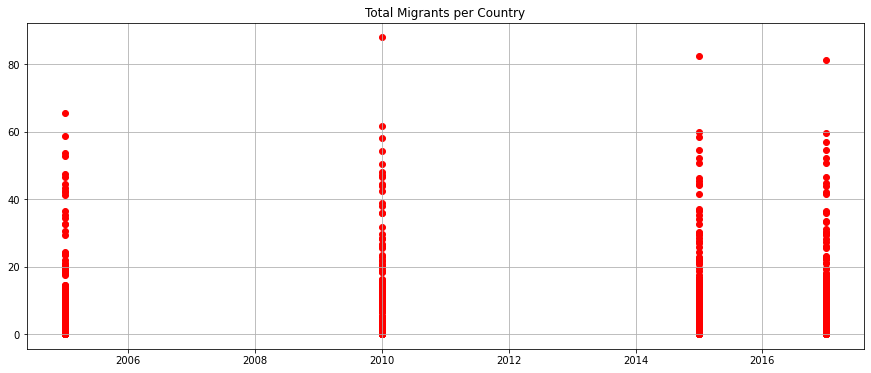

In [211]:
# This scatter plot is showing different levels of geography from countries to regions.
# For my purpose I'm focusing on trends in Syria and Ukraine
plt.figure(figsize=(15,6))
plt.scatter(EX.Year, EX.Value, color="r")
plt.title("Total Migrants per Country")
plt.grid(True)
plt.show()

In [29]:
INTL_Migrant_Female = df[(df.Series == 'International migrant stock: Female (% total Population)')]

In [30]:
INTL_Migrant_Female

,Geography_ID,Geography_Name,Year,Series,Value,Footnotes,Source,Unnamed: 7,Unnamed: 8
3,1,"Total, all countries or areas",2005,International migrant stock: Female (% total P...,2.8733,NaN,"United Nations Population Division, New York, ...",NaN,NaN
7,1,"Total, all countries or areas",2010,International migrant stock: Female (% total P...,3.0856,NaN,"United Nations Population Division, New York, ...",NaN,NaN
11,1,"Total, all countries or areas",2015,International migrant stock: Female (% total P...,3.2798,NaN,"United Nations Population Division, New York, ...",NaN,NaN
19,1,"Total, all countries or areas",2017,International migrant stock: Female (% total P...,3.3318,NaN,"United Nations Population Division, New York, ...",NaN,NaN
31,2,Africa,2005,International migrant stock: Female (% total P...,1.5204,NaN,"United Nations Population Division, New York, ...",NaN,NaN
...,...,...,...,...,...,...,...,...,...
7070,894,Zambia,2017,International migrant stock: Female (% total P...,0.9017,Including refugees.,"United Nations Population Division, New York, ...",NaN,NaN
7082,716,Zimbabwe,2005,International migrant stock: Female (% total P...,2.5466,Including refugees.,"United Nations Population Division, New York, ...",NaN,NaN
7090,716,Zimbabwe,2010,International migrant stock: Female (% total P...,2.3650,Including refugees.,"United Nations Population Division, New York, ...",NaN,NaN
7097,716,Zimbabwe,2015,International migrant stock: Female (% total P...,2.1790,Including refugees.,"United Nations Population Division, New York, ...",NaN,NaN


In [24]:
Sy = df[(df.Geography_Name == 'Syrian Arab Republic') & (df.Series == 'International migrant stock: Both sexes (number)')]

In [25]:
Sy

,Geography_ID,Geography_Name,Year,Series,Value,Footnotes,Source,Unnamed: 7,Unnamed: 8
6259,760,Syrian Arab Republic,2005,International migrant stock: Both sexes (number),876410.0,Including refugees.,Refers to foreign citizens.,"United Nations Population Division, New York, ...",NaN
6267,760,Syrian Arab Republic,2010,International migrant stock: Both sexes (number),1785115.0,Including refugees.,Refers to foreign citizens.,"United Nations Population Division, New York, ...",NaN
6275,760,Syrian Arab Republic,2015,International migrant stock: Both sexes (number),993940.0,Including refugees.,Refers to foreign citizens.,"United Nations Population Division, New York, ...",NaN
6283,760,Syrian Arab Republic,2017,International migrant stock: Both sexes (number),1013818.0,Including refugees.,Refers to foreign citizens.,"United Nations Population Division, New York, ...",NaN


In [26]:
Uk = df[(df.Geography_Name == 'Ukraine') & (df.Series == 'International migrant stock: Both sexes (number)')]

In [27]:
Uk

,Geography_ID,Geography_Name,Year,Series,Value,Footnotes,Source,Unnamed: 7,Unnamed: 8
6647,804,Ukraine,2005,International migrant stock: Both sexes (number),5050302.0,Including Crimea.,"United Nations Population Division, New York, ...",NaN,NaN
6655,804,Ukraine,2010,International migrant stock: Both sexes (number),4818767.0,Including Crimea.,"United Nations Population Division, New York, ...",NaN,NaN
6663,804,Ukraine,2015,International migrant stock: Both sexes (number),4915142.0,Including Crimea.,"United Nations Population Division, New York, ...",NaN,NaN
6671,804,Ukraine,2017,International migrant stock: Both sexes (number),4964293.0,Including Crimea.,"United Nations Population Division, New York, ...",NaN,NaN


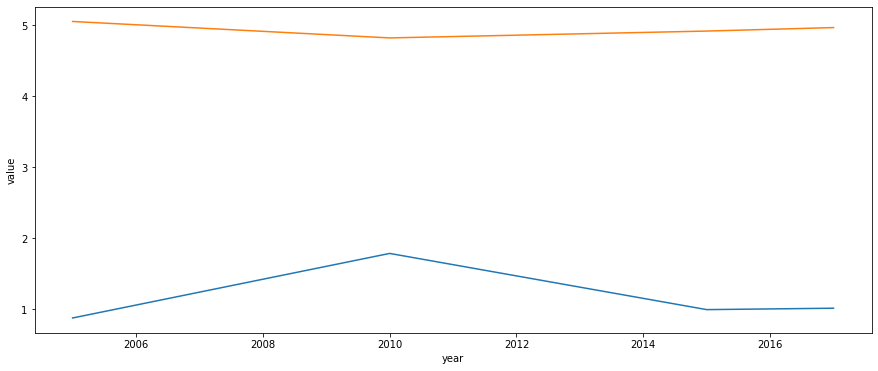

In [28]:
plt.figure(figsize=(15,6))
plt.plot(Sy.Year, Sy.Value / 10**6)
plt.plot(Uk.Year, Uk.Value / 10**6)
plt.xlabel('year')
plt.ylabel('value')
plt.show()

## Here is a

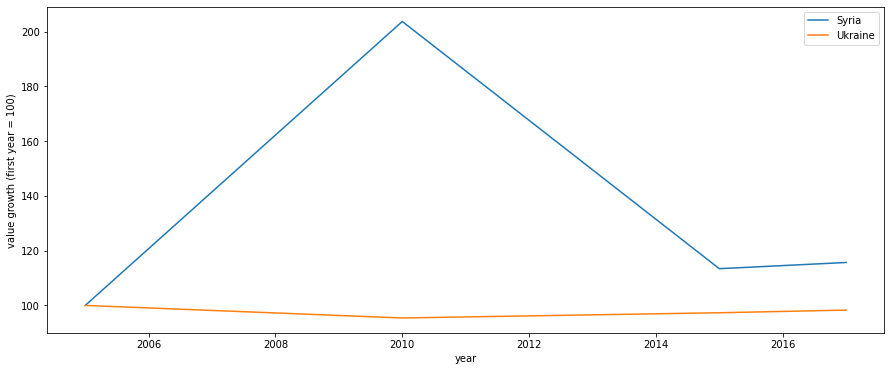

In [13]:
plt.figure(figsize=(15,6))
plt.plot(Sy.Year, Sy.Value / Sy.Value.iloc[0] * 100)
plt.plot(Uk.Year, Uk.Value / Uk.Value.iloc[0] * 100)
plt.legend(['Syria', 'Ukraine'])
plt.xlabel('year')
plt.ylabel('value growth (first year = 100)')
plt.show()

- <h4> Which countries export the most refugees?


In [109]:
refugee_nb = pd.DataFrame(df.groupby('Geography_Name').sum())

In [118]:
refugee_nb.sort_values('Value',ascending=False)

,Geography_ID,Year,Value
Geography_Name,,,
"Total, all countries or areas",28,56388,1.307291e+09
Asia,3976,56388,4.485362e+08
Europe,4200,56388,3.208810e+08
Northern America,546,52356,2.155569e+08
Africa,56,56388,2.087888e+08
...,...,...,...
Holy See,2688,16094,3.587000e+03
Saint Helena,5232,16094,2.320953e+03
Niue,4560,16094,2.309822e+03


In [128]:
df2 = pd.DataFrame(df.drop(index=df[df['Geography_Name'] == 'Total, all countries or areas'].index))

In [130]:
df2.sort_values('Value',ascending=False)

,Geography_ID,Geography_Name,Year,Series,Value,Footnotes,Source,Unnamed: 7,Unnamed: 8
270,142,Asia,2017,International migrant stock: Both sexes (number),7.958671e+07,NaN,"United Nations Population Division, New York, ...",NaN,NaN
378,150,Europe,2017,International migrant stock: Both sexes (number),7.789522e+07,NaN,"United Nations Population Division, New York, ...",NaN,NaN
262,142,Asia,2015,International migrant stock: Both sexes (number),7.655815e+07,NaN,"United Nations Population Division, New York, ...",NaN,NaN
370,150,Europe,2015,International migrant stock: Both sexes (number),7.450151e+07,NaN,"United Nations Population Division, New York, ...",NaN,NaN
366,150,Europe,2010,International migrant stock: Both sexes (number),7.074795e+07,NaN,"United Nations Population Division, New York, ...",NaN,NaN
...,...,...,...,...,...,...,...,...,...
1780,156,China,2015,International migrant stock: Female (% total P...,5.580000e-02,"For statistical purposes, the data for China d...","United Nations Population Division, New York, ...",NaN,NaN
1773,156,China,2010,International migrant stock: Female (% total P...,5.210000e-02,"For statistical purposes, the data for China d...","United Nations Population Division, New York, ...",NaN,NaN
1763,156,China,2005,International migrant stock: Both sexes (% tot...,5.140000e-02,"For statistical purposes, the data for China d...","United Nations Population Division, New York, ...",NaN,NaN
6958,704,Viet Nam,2005,International migrant stock: Female (% total P...,4.830000e-02,Including refugees.,Refers to foreign citizens.,"United Nations Population Division, New York, ...",NaN


In [132]:
df2.tail()

,Geography_ID,Geography_Name,Year,Series,Value,Footnotes,Source,Unnamed: 7,Unnamed: 8
7109,716,Zimbabwe,2017,Total population of concern to UNHCR (number),10970.0,NaN,United Nations High Commissioner for Refugees ...,NaN,NaN
7110,716,Zimbabwe,2018,Total refugees and people in refugee-like situ...,7707.0,NaN,United Nations High Commissioner for Refugees ...,NaN,NaN
7111,716,Zimbabwe,2018,"Asylum seekers, including pending cases (number)",8391.0,NaN,United Nations High Commissioner for Refugees ...,NaN,NaN
7112,716,Zimbabwe,2018,Other of concern to UNHCR (number),3696.0,A study is being pursued to provide a revised ...,United Nations High Commissioner for Refugees ...,NaN,NaN
7113,716,Zimbabwe,2018,Total population of concern to UNHCR (number),19794.0,NaN,United Nations High Commissioner for Refugees ...,NaN,NaN
